In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "/home/bflaggs/auger/SKALA/iklogs/LetyT3Requests_2025_08_15_wTriggerInfo.txt"

In [3]:
data = np.loadtxt(filepath, dtype=str, delimiter=", ", skiprows=1)

In [4]:
data[0]

array(['1439251216', '935450', '0', '20', 'XbFast'], dtype='<U10')

In [5]:
type(data), type(data[0]), data.shape

(numpy.ndarray, numpy.ndarray, (6665, 5))

In [6]:
# Sort data by GPS time in seconds (column 0) and then by GPS microseconds (column 1)
sortedData = data[np.lexsort((data[:, 1], data[:, 0]))]

In [7]:
# Check it sorted correctly
sortedData[0:6], data[0:6]

(array([['1439251216', '935450', '0', '20', 'XbFast'],
        ['1439251218', '96990', '-118', '30', 'Xb'],
        ['1439251228', '316874', '0', '0', 'XbFast'],
        ['1439251232', '778634', '-124', '30', 'Xb'],
        ['1439251233', '641032', '-44', '20', 'Fd'],
        ['1439251233', '641116', '-122', '30', 'Xb']], dtype='<U10'),
 array([['1439251216', '935450', '0', '20', 'XbFast'],
        ['1439251218', '96990', '-118', '30', 'Xb'],
        ['1439251228', '316874', '0', '0', 'XbFast'],
        ['1439251233', '641032', '-44', '20', 'Fd'],
        ['1439251232', '778634', '-124', '30', 'Xb'],
        ['1439251233', '641116', '-122', '30', 'Xb']], dtype='<U10'))

In [8]:
# Now sort including the offsets in microseconds (column 3)
us_with_offsets = data[:, 1].astype(float) + data[:, 2].astype(float)
sortedData_withOffsets = data[np.lexsort((us_with_offsets, data[:, 0]))]

In [9]:
# Check output...
print(data[0:6])
print("\n")
print(sortedData[0:6])
print("\n")
print(sortedData_withOffsets[0:6])

[['1439251216' '935450' '0' '20' 'XbFast']
 ['1439251218' '96990' '-118' '30' 'Xb']
 ['1439251228' '316874' '0' '0' 'XbFast']
 ['1439251233' '641032' '-44' '20' 'Fd']
 ['1439251232' '778634' '-124' '30' 'Xb']
 ['1439251233' '641116' '-122' '30' 'Xb']]


[['1439251216' '935450' '0' '20' 'XbFast']
 ['1439251218' '96990' '-118' '30' 'Xb']
 ['1439251228' '316874' '0' '0' 'XbFast']
 ['1439251232' '778634' '-124' '30' 'Xb']
 ['1439251233' '641032' '-44' '20' 'Fd']
 ['1439251233' '641116' '-122' '30' 'Xb']]


[['1439251216' '935450' '0' '20' 'XbFast']
 ['1439251218' '96990' '-118' '30' 'Xb']
 ['1439251228' '316874' '0' '0' 'XbFast']
 ['1439251232' '778634' '-124' '30' 'Xb']
 ['1439251233' '641032' '-44' '20' 'Fd']
 ['1439251233' '641116' '-122' '30' 'Xb']]


In [10]:
# Quick math check on final two sorted entries
641032 - 44, 641116 - 122

(640988, 640994)

In [11]:
# Calculate time differences, accounting for offsets
d_ts_sorted_offsets = []
triggerTypes = []

for i in range(1, len(sortedData_withOffsets)):
    t1 = float(sortedData_withOffsets[i][0]) + \
         (float(sortedData_withOffsets[i][1]) + float(sortedData_withOffsets[i][2]))/ 1e6
    t0 = float(sortedData_withOffsets[i-1][0]) + \
         (float(sortedData_withOffsets[i-1][1]) + float(sortedData_withOffsets[i-1][2])) / 1e6
    dt = t1 - t0

    if sortedData_withOffsets[i][4] not in triggerTypes:
        triggerTypes.append(sortedData_withOffsets[i][4])

    # This should cut out multi-triggers (i.e. different triggers including Lety within 1s)
    # One second was chosen arbitrarily, not sure what a good cut would be
    if dt <= 1.0 and sortedData_withOffsets[i][4] != sortedData_withOffsets[i-1][4]:
        continue
    else:
        # This would include same trigger-type multi-triggers (i.e. two requests of same type within 1s)
        # These could be larger events generating multiple T3 requests in same vicinity
        # Or two separate events in same second (less likely but possible)
        # They would need to be within same local area to have Lety included in the request...
        d_ts_sorted_offsets.append(dt)

print(f"Number of time differences (no cuts): {len(data) - 1}")
print(f"Number of time differences (cut multi-triggers): {len(d_ts_sorted_offsets)}")
print(f"Different trigger types for all T3 requests involving Lety: {triggerTypes}")

Number of time differences (no cuts): 6664
Number of time differences (cut multi-triggers): 5954
Different trigger types for all T3 requests involving Lety: ['Xb', 'XbFast', 'Fd']


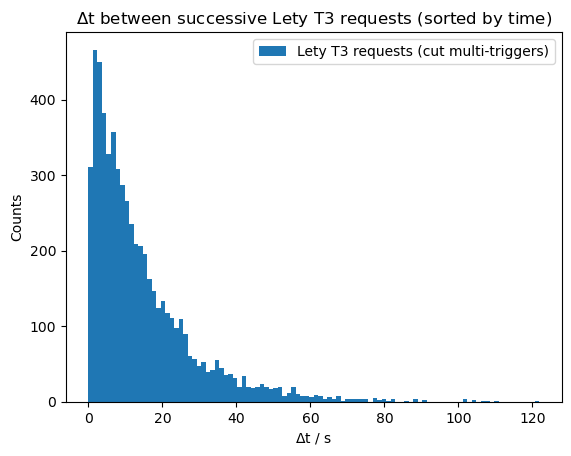

In [15]:
plt.hist(d_ts_sorted_offsets, bins=100, label="Lety T3 requests (cut multi-triggers)")
plt.xlabel(r"$\Delta$t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$t between successive Lety T3 requests (sorted by time)")
plt.legend()
plt.show()

In [16]:
sortedData_withOffsets, type(sortedData_withOffsets), sortedData_withOffsets.shape, len(sortedData_withOffsets)

(array([['1439251216', '935450', '0', '20', 'XbFast'],
        ['1439251218', '96990', '-118', '30', 'Xb'],
        ['1439251228', '316874', '0', '0', 'XbFast'],
        ...,
        ['1439337603', '51307', '-44', '20', 'Fd'],
        ['1439337607', '18039', '0', '20', 'XbFast'],
        ['1439337607', '18164', '-124', '30', 'Xb']], dtype='<U10'),
 numpy.ndarray,
 (6665, 5),
 6665)

In [17]:
# Filter sorted data to include only rows where column 3 (window) is 0
# This corresponds to requests where Lety was DIRECTLY involved in the T3 request
letyOnly = sortedData_withOffsets[sortedData_withOffsets[:, 3].astype(int) == 0]

# Should already be sorted by time but check explicitly (check size too)
letyOnly, letyOnly.shape, len(letyOnly)


(array([['1439251228', '316874', '0', '0', 'XbFast'],
        ['1439251483', '948502', '0', '0', 'XbFast'],
        ['1439251565', '981615', '1', '0', 'XbFast'],
        ...,
        ['1439337282', '523803', '0', '0', 'XbFast'],
        ['1439337345', '848210', '0', '0', 'XbFast'],
        ['1439337468', '98192', '2', '0', 'XbFast']], dtype='<U10'),
 (648, 5),
 648)

In [18]:
# Apply same cuts as before on time differences and multi-triggers, checking types of triggers involved
d_ts_onlyLety_noCuts = []
d_ts_onlyLety = []
triggerTypes_onlyLety = []

for i in range(1, len(letyOnly)):
    t1 = float(letyOnly[i][0]) + \
        (float(letyOnly[i][1]) + float(letyOnly[i][2]))/ 1e6
    t0 = float(letyOnly[i-1][0]) + \
        (float(letyOnly[i-1][1]) + float(letyOnly[i-1][2])) / 1e6
    dt = t1 - t0

    d_ts_onlyLety_noCuts.append(dt)

    if letyOnly[i][4] not in triggerTypes_onlyLety:
        triggerTypes_onlyLety.append(letyOnly[i][4])

    # This should cut out multi-triggers (i.e. different triggers including Lety within 1s)
    # One second was chosen arbitrarily, not sure what a good cut would be
    if dt <= 1.0 and letyOnly[i][4] != letyOnly[i-1][4]:
        continue
    else:
        d_ts_onlyLety.append(dt)

print(f"Number of Lety only time differences (no cuts): {len(d_ts_onlyLety_noCuts)}")
print(f"Number of Lety only time differences (cut multi-triggers including offsets): {len(d_ts_onlyLety)}")
print(f"Different trigger types involving Lety DIRECTLY in the T3 request: {triggerTypes_onlyLety}")


Number of Lety only time differences (no cuts): 647
Number of Lety only time differences (cut multi-triggers including offsets): 647
Different trigger types involving Lety DIRECTLY in the T3 request: ['XbFast']


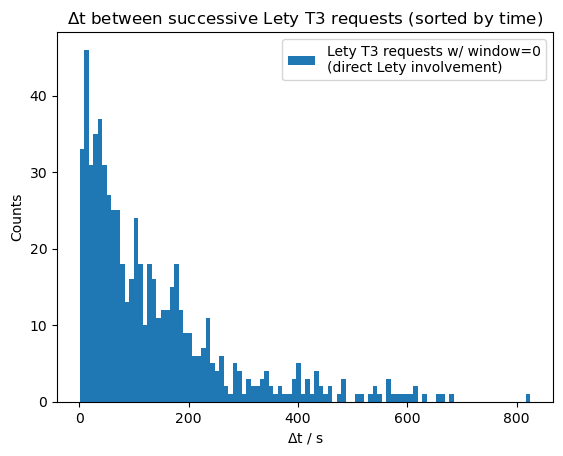

In [21]:
# Make histogram of delta t values only taking into acocunt requests where Lety was involved directly (i.e. window = 0)
plt.hist(d_ts_onlyLety, bins=100, label="Lety T3 requests w/ window=0" + "\n" + "(direct Lety involvement)")
plt.xlabel(r"$\Delta$t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$t between successive Lety T3 requests (sorted by time)")
plt.legend()
plt.show()

In [22]:
min(d_ts_onlyLety)

0.558081865310669

In [23]:
# Calculate rate of T3 requests where Lety was directly involved (should be ~0.01 Hz)
len(d_ts_onlyLety) / 86400.0 # daily rate in Hz for this date (Aug. 15, 2025)

0.007488425925925926